In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/My Drive/Neural_networks/Churn.csv")

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Checking the shape of the data
data.shape

(10000, 14)

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No Null values !!

In [8]:
data.duplicated().sum()

0

No dupes !

In [9]:
#Checking the dtypes of the variables in the data
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

drop'RowNumber','CustomerId','Surname' as they are no value in the Model

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

This is an unbalanced dataset. May pose problem in the Model MEtrics

In [13]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [14]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

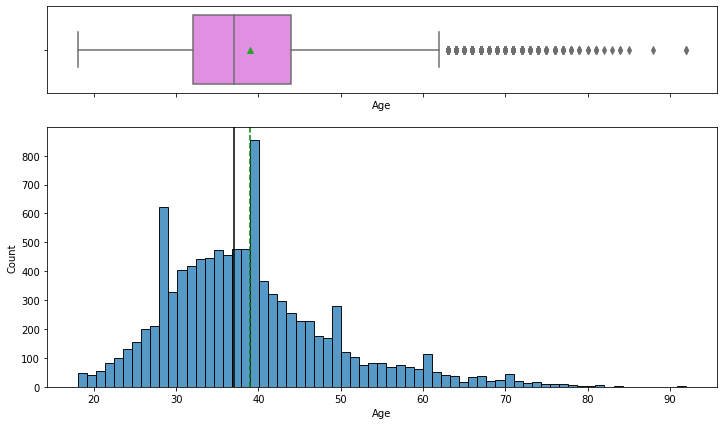

In [15]:
histogram_boxplot(data, "Age")

There are some people more than 80 years. 

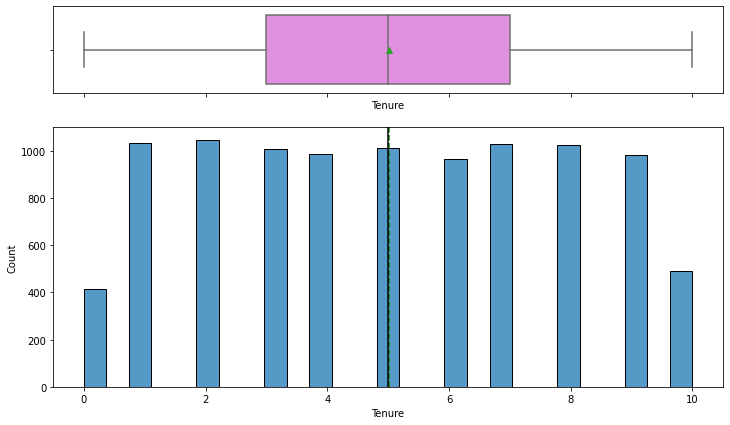

In [16]:
histogram_boxplot(data, "Tenure")

Members stayed in the bank upto 10 years !!
5 years is the average tenure. 
About 50% are less than 5 years and we need to target these people so that they do not exit. 

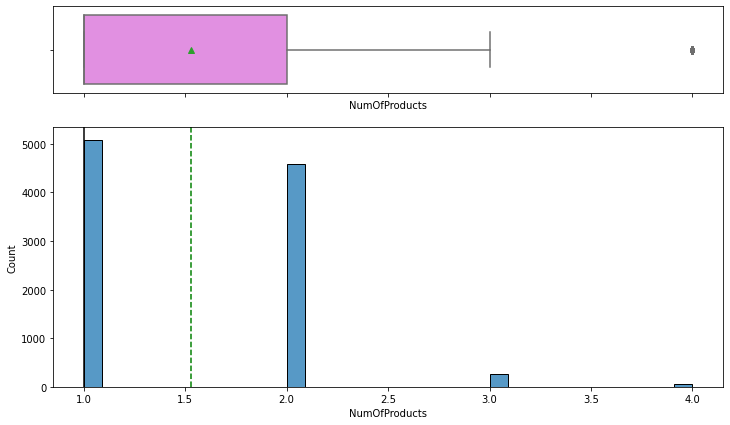

In [17]:
histogram_boxplot(data, "NumOfProducts")

There are 4 products the bank offers. Out of which most (about 50%) customers use 1 product and about 45% use 2 products and very few people use 4 products. 
As these are real users , I dont want to treat any outliers. 

NumOfProducts 

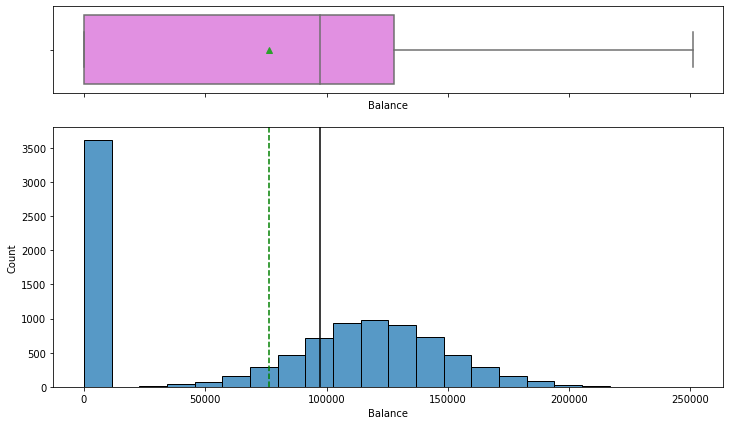

In [18]:
histogram_boxplot(data, "Balance")

There are few people with 200,000 and more Balance.

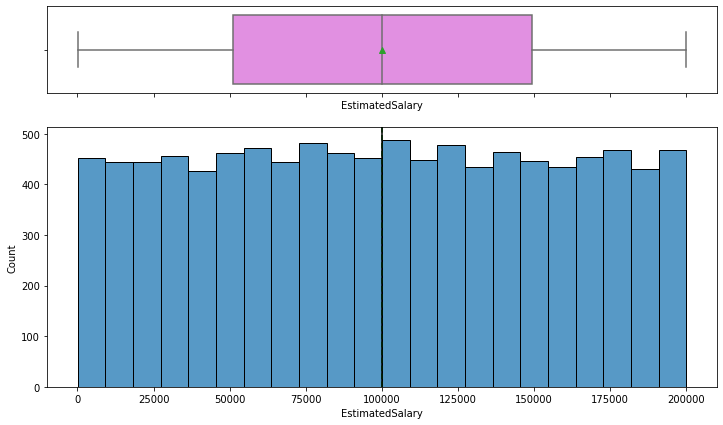

In [19]:
histogram_boxplot(data, "EstimatedSalary")

In [20]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

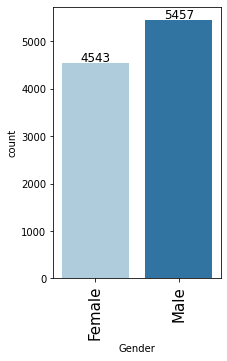

In [21]:
labeled_barplot(data, "Gender")

Men are slight higher in number 

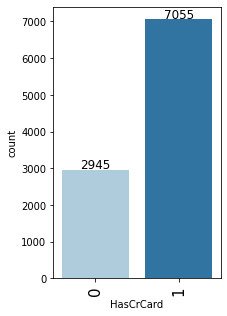

In [22]:
labeled_barplot(data, "HasCrCard")

 HasCrCard: About 7055 (70%) people have credit card

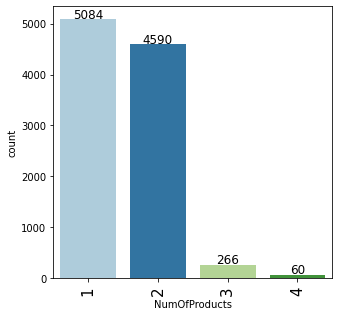

In [23]:
labeled_barplot(data, "NumOfProducts")

ABout 50% have one product, followed by 46% have 2 products , only 60 people have 4 products

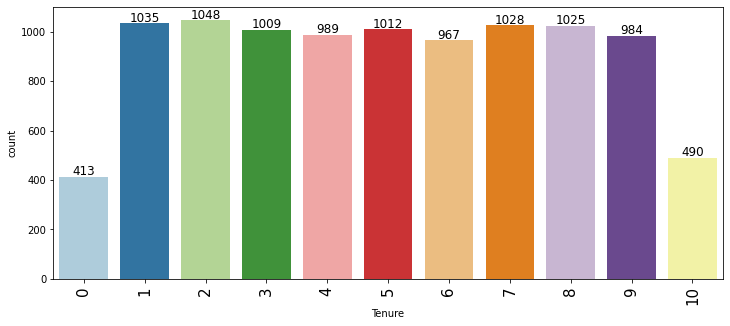

In [24]:
labeled_barplot(data, "Tenure")

Tenure: Little about 50% people are 5 and less years with the bank. 
THese are the people who neends to be targeted. 
About 500 people are for 10 years, and about 400 are less than a year

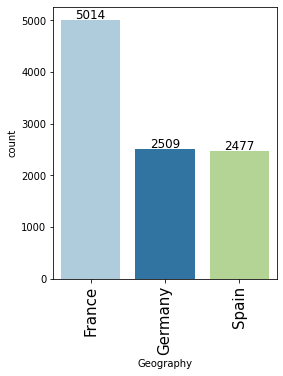

In [25]:
labeled_barplot(data, "Geography")

The members are from three countries, France-highest, Germany and Spain follow in that order

The salary is normally distibuted. !

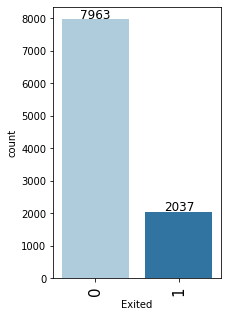

In [26]:
labeled_barplot(data, "Exited")

This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
Only ~20% of the customers in this dataset have exited the bank. 
Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

# **Bivariate Analysis**

In [27]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

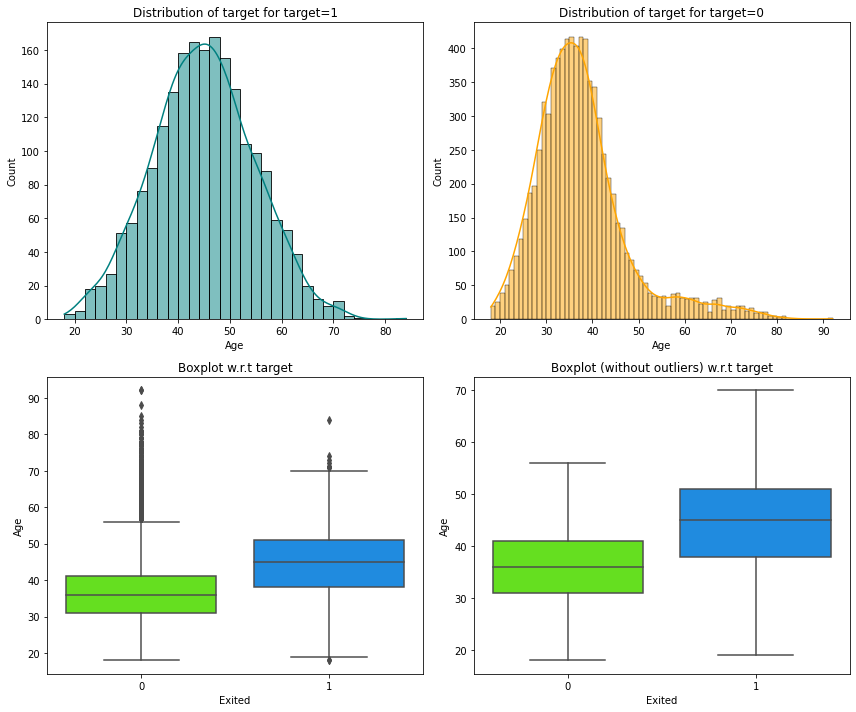

In [28]:
distribution_plot_wrt_target(data, "Age", "Exited")

The Median age of people who exited the bank is higher Appr. 46 yers. 
The people who stay in the bank younger . 


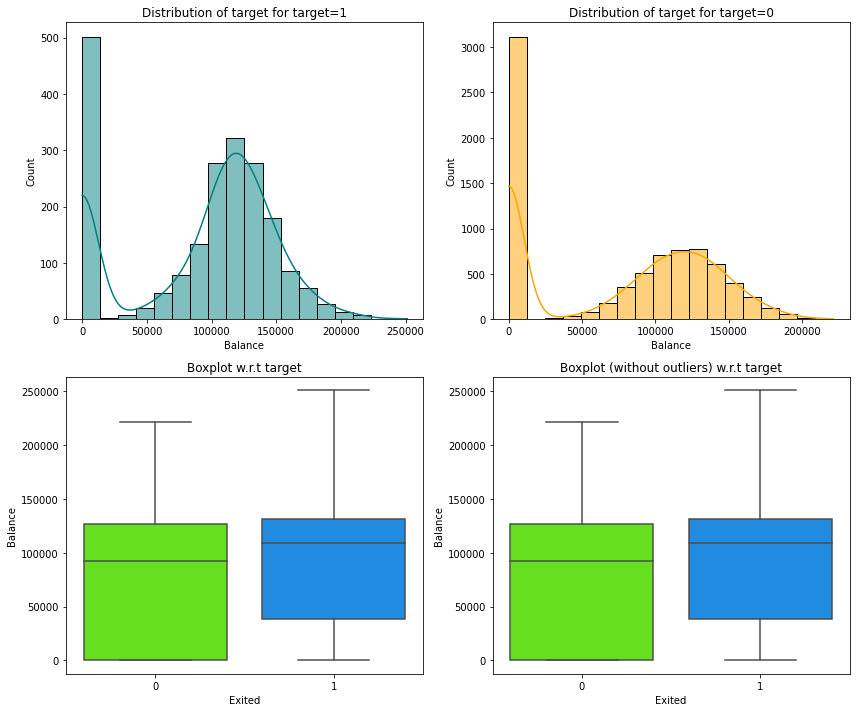

In [29]:
distribution_plot_wrt_target(data, "Balance", "Exited")

People who DID NOT EXIT the bank have slightly more balance (120000ish) than the customers who exited (little less than 100000)

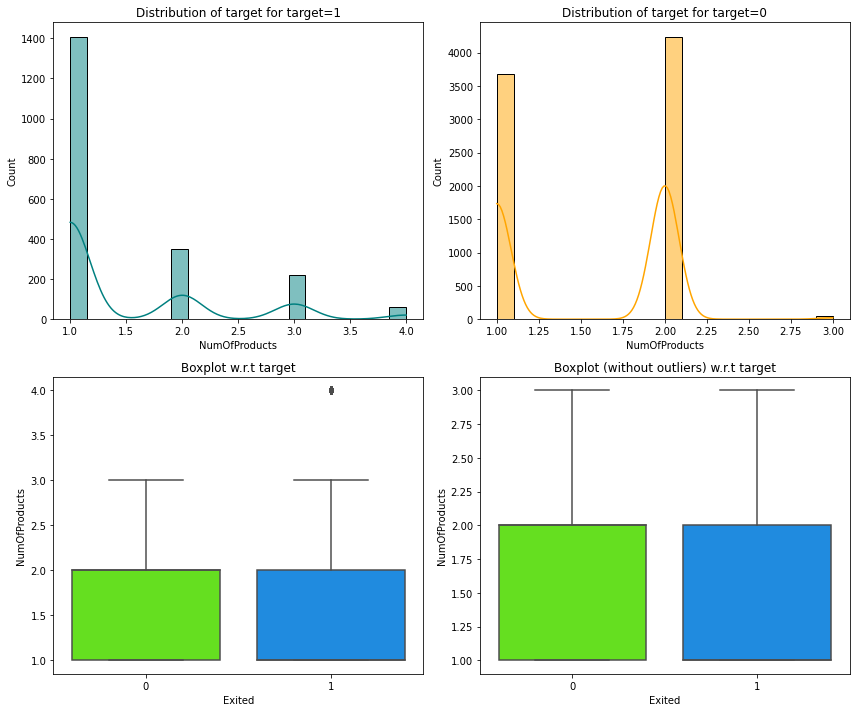

In [129]:
distribution_plot_wrt_target(data, "NumOfProducts", "Exited")

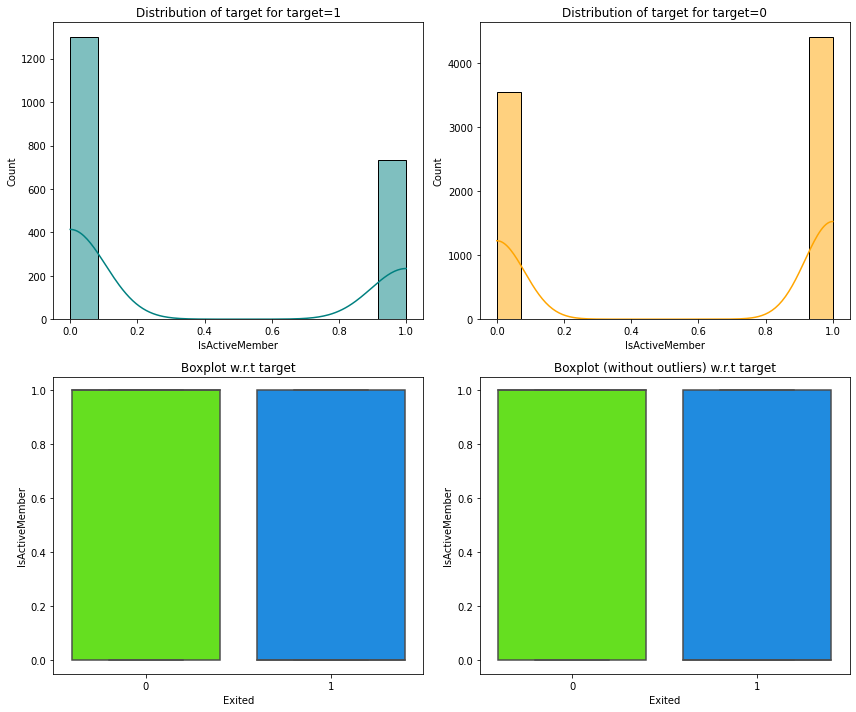

In [130]:
distribution_plot_wrt_target(data, "IsActiveMember", "Exited")

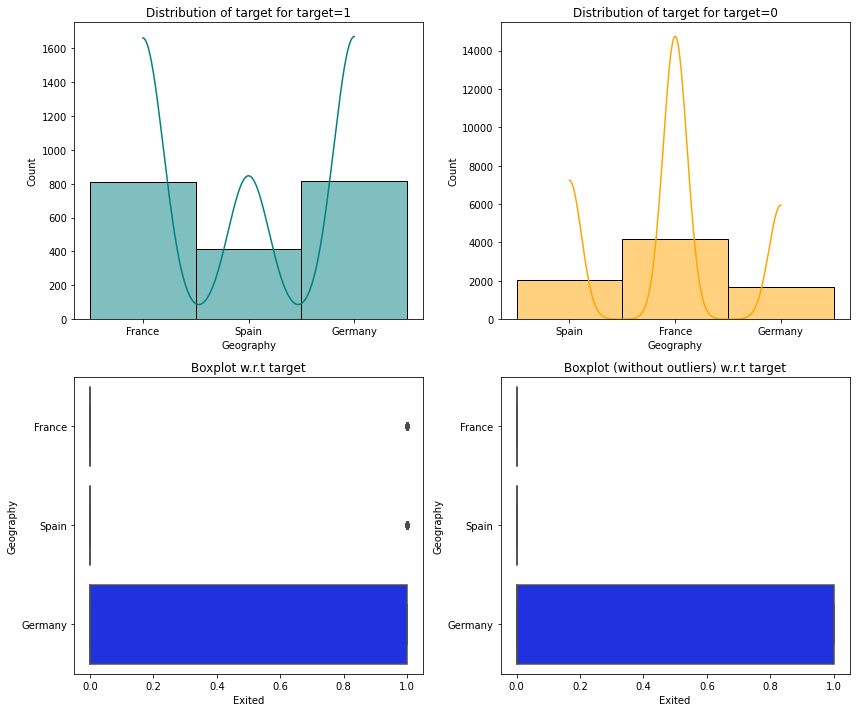

In [131]:
distribution_plot_wrt_target(data, "Geography", "Exited")

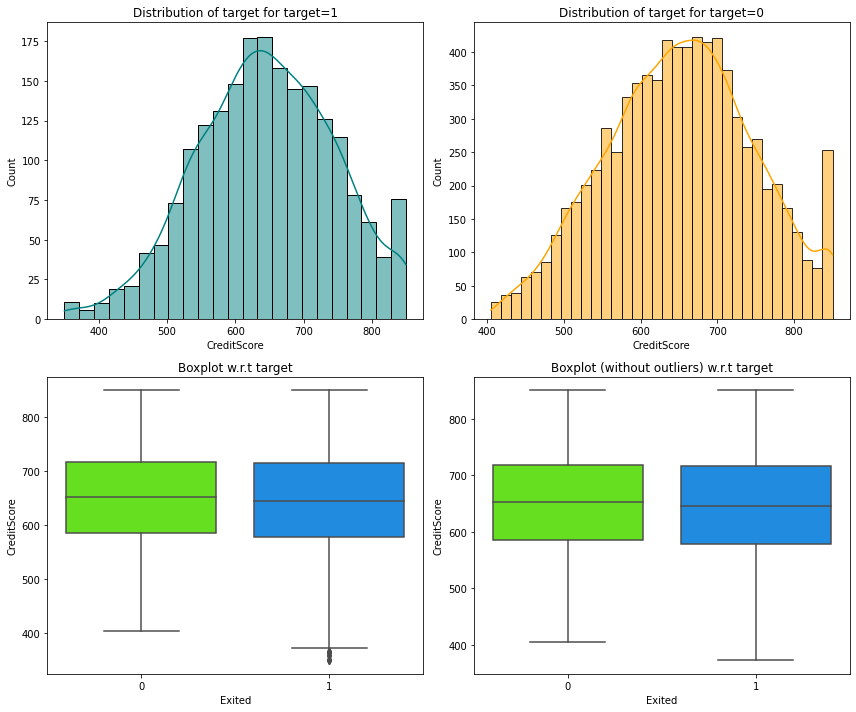

In [132]:
distribution_plot_wrt_target(data, "CreditScore", "Exited")

sActiveMember  

# **Model Building**

In [30]:
## Separating Independent and Dependent Columns
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

In [31]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [32]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

Checking that all Training set has values

In [33]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
------------------------------
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


In [34]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,692,Germany,Male,49,6,110540.43,2,0,1,107472.99


# **Encoding Categorical Columns**

`**We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.**`





In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder_RE = LabelEncoder()
X_train['Gender']= labelencoder_RE.fit_transform(X_train['Gender'])
X_test['Gender']= labelencoder_RE.transform(X_test['Gender'])

In [36]:
labelencoder_RE = LabelEncoder()
X_train['Geography']= labelencoder_RE.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_RE.transform(X_test['Geography'])

In [37]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,753,0,1,57,7,0.00,1,1,0,159475.08
8392,739,1,1,32,3,102128.27,1,1,0,63981.37
5006,755,1,0,37,0,113865.23,2,1,1,117396.25
4117,561,0,1,37,5,0.00,2,1,0,83093.25
7182,692,1,1,49,6,110540.43,2,0,1,107472.99


In [38]:
y_train.head()

,Exited
2151,1
8392,1
5006,0
4117,0
7182,0


In [39]:
## Scaling the data for the colums credit score, balance and Estimated salary
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Balance","EstimatedSalary"]])
X_train[["CreditScore","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Balance","EstimatedSalary"]])
X_test[["CreditScore","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Balance","EstimatedSalary"]])


In [40]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000, 1)
(2000, 1)


In [41]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [42]:
# Initializing the ANN
model = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 10, units=64))
#Add 1st hidden layer
model.add(Dense(32, activation='relu'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,873
Trainable params: 3,873
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compiling the model with categorical crossentropy as loss function with accuracy as metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 10) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 10) float32
dense_1 (None, 64) float32
dense_2 (None, 32) float32
dense_3 (None, 32) float32


[None, None, None, None]

In [46]:
#Definign the number of epochs
EPOCHS = 50
#fitting the model
history = model.fit(X_train, y_train,epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/50
200/200 [==============================] - 6s 5ms/step - loss: 0.5888 - accuracy: 0.7792 - val_loss: 0.4914 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4749 - accuracy: 0.7937 - val_loss: 0.4715 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4658 - accuracy: 0.7947 - val_loss: 0.4539 - val_accuracy: 0.8156
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4597 - accuracy: 0.8008 - val_loss: 0.4650 - val_accuracy: 0.8025
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.4536 - accuracy: 0.8042 - val_loss: 0.4498 - val_accuracy: 0.8175
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4490 - accuracy: 0.8020 - val_loss: 0.4559 - val_accuracy: 0.8050
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4481 - accuracy: 0.8047 - val_loss: 0.4509 - val_accuracy: 0.8100
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8555


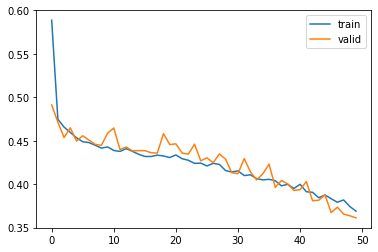

In [47]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

Here the fit looks ok and infact down ward. I tried to increase the epochs to 70 then it started looking u shape , i.e loss increasing

In [48]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [49]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

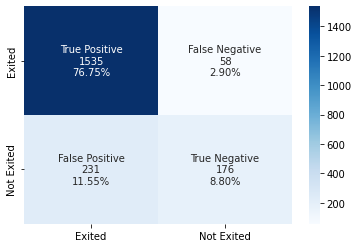

In [50]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Exited','Not Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here, the 2.6%% of False Negatives is because we gave 0.5 as the threshold to the model, and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve.

In [51]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



As you can see, the above model has a ok accuracy and  F1-score. Recall of 97% is also not bad for "non-exited customers" but for exited it is only 37%.  This could be due to the imbalanced dataset. We observe that the False positive  are also high, which should be considerably lower.
1) Imbalanced dataset:  this dataset is imbalanced, and it contains more examples that belong to the 0 class.
2) Decision Threshold: We randimly used 0.5 as thredshod. Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.
Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.

**Finding Opitmum Threshold**

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.193893, G-Mean=0.747


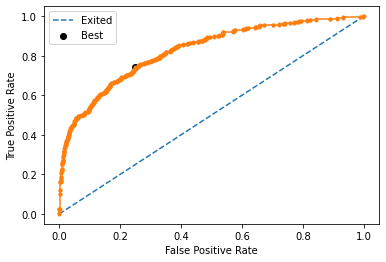

In [52]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Exited')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Let's tune the threshold using ROC-AUC
There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.
Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.
Sensitivity = True Positive / (True Positive + False Negative)
Specificity = True Negative / (False Positive + True Negative)
Where:
Sensitivity = True Positive Rate
Specificity = 1 – False Positive Rate
The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.
G-Mean = sqrt(Sensitivity * Specificity)
One approach would be to test the model with each threshold returned from the call roc_auc_score(),
and select the threshold with the largest G-Mean value.

Our Best threshold was anout 0.78. 
Lets see if we can improve this.

In [53]:
#Predicting the results using best as a threshold
y_pred_e=model.predict(X_test)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

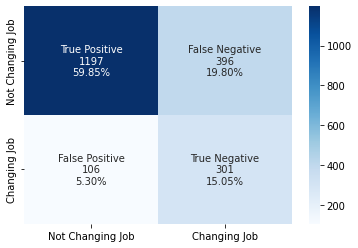

In [54]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [55]:
#Accuracy as per the classification report 
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1593
           1       0.43      0.74      0.55       407

    accuracy                           0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.75      0.77      2000



The prediction of the "Exited customers " have decreased  from 75 % to 43%. 
F1 score is not so great, and predicting exits are also bad.
LEts apply other strategies and see. 

**SMOTE** **Apply**

In [56]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

# Also, tuning the hyperparameters

In [57]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [58]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.8 MB/s eta 0:00:00


In [59]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [60]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Exited')

Number of layeers: are from 2- 10 , increment by 1
No. of neurons for input layer : 32 to 256, increase by 32 
no of units for hidden layers: 32 to 256 bold text
learning rate choices bold text bold text bold text

In [61]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Using the SMOTE sample

In [62]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 34s]
val_accuracy: 0.8386970361073812

Best val_accuracy So Far: 0.8410517970720927
Total elapsed time: 00h 03m 18s


In [63]:
tuner_2.results_summary()

Results summary
Results in ./Exited
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 3
units_0: 224
units_1: 224
learning_rate: 0.001
units_2: 256
units_3: 256
units_4: 96
units_5: 256
units_6: 128
Score: 0.8410517970720927
Trial summary
Hyperparameters:
num_layers: 2
units_0: 192
units_1: 96
learning_rate: 0.01
units_2: 224
units_3: 64
units_4: 96
units_5: 256
units_6: 224
Score: 0.8386970361073812
Trial summary
Hyperparameters:
num_layers: 2
units_0: 96
units_1: 160
learning_rate: 0.01
units_2: 96
units_3: 32
units_4: 64
units_5: 256
units_6: 160
Score: 0.8301936189333597
Trial summary
Hyperparameters:
num_layers: 4
units_0: 256
units_1: 160
learning_rate: 0.0001
units_2: 192
units_3: 192
units_4: 192
units_5: 32
units_6: 32
Score: 0.8121402263641357
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 256
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.7286761005719503


Results summary
Results in ./Exited
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7f25fb5679d0>
Trial summary
Hyperparameters:
num_layers: 3
units_0: 224
units_1: 224
learning_rate: 0.001
units_2: 256
units_3: 256
units_4: 96
units_5: 256
units_6: 128
Score: 0.8460230231285095

In [64]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Modelr=after hypertuning + smote

Adding the HYperparamerts to the model

In [65]:
# Initializing the ANN
modelr = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
modelr.add(Dense(activation = 'relu', input_dim = 10, units=224))
#Add 1st hidden layer
modelr.add(Dense(224, activation='relu'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
modelr.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 128 neurons, relu as activation function and, he_uniform as weight initializer
modelr.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 128 neurons, relu as activation function and, he_uniform as weight initializer
modelr.add(Dense(96, activation='relu',kernel_initializer='he_uniform'))# Adding the second hidden layer with 128 neurons, relu as activation function and, he_uniform as weight initializer
modelr.add(Dense(256, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 128 neurons, relu as activation function and, he_uniform as weight initializer
modelr.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))


# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
modelr.add(Dense(1, activation = 'sigmoid'))

In [66]:
modelr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224)               2464      
                                                                 
 dense_1 (Dense)             (None, 224)               50400     
                                                                 
 dense_2 (Dense)             (None, 256)               57600     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 96)                24672     
                                                                 
 dense_5 (Dense)             (None, 256)               24832     
                                                                 
 dense_6 (Dense)             (None, 128)               3

In [67]:
# Defining the optimizer
optimizer = tf.keras.optimizers.Adam(0.001) 

In [68]:
# # Compile model
modelr.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [69]:
#Definign the number of epochs
EPOCHS = 50
#fitting the model
historyr = modelr.fit(X_train, y_train,epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/50
200/200 [==============================] - 7s 11ms/step - loss: 0.5521 - accuracy: 0.7848 - val_loss: 0.5078 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4801 - accuracy: 0.7934 - val_loss: 0.4589 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4616 - accuracy: 0.7975 - val_loss: 0.4696 - val_accuracy: 0.8056
Epoch 4/50
200/200 [==============================] - 3s 14ms/step - loss: 0.4583 - accuracy: 0.7977 - val_loss: 0.4552 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4531 - accuracy: 0.7981 - val_loss: 0.4651 - val_accuracy: 0.8081
Epoch 6/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4460 - accuracy: 0.8011 - val_loss: 0.4523 - val_accuracy: 0.8100
Epoch 7/50
200/200 [==============================] - 2s 9ms/step - loss: 0.4465 - accuracy: 0.7980 - val_loss: 0.4492 - val_accuracy: 0.8000
Epo

In [70]:
#y_pred_e=model.predict(X_test)
#y_pred_e = (y_pred_e > thresholds[ix])
#y_pred_e

#Predicting the results using best as a threshold
#y_pred_e1=model1.predict(X_test)
#y_pred_e1 = (y_pred_e1 > thresholds1[ix])
#y_pred_e1

In [71]:

y_predr=modelr.predict(X_test)
y_predr = (y_predr > 0.5)
y_predr


63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

63/63 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8625


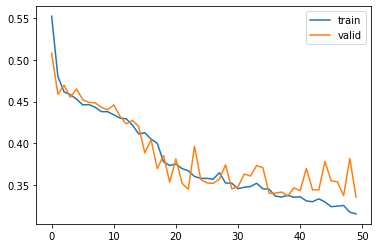

In [72]:
# Capturing learning history per epoch
histr  = pd.DataFrame(historyr.history)
hist['epoch'] = historyr.epoch

# Plotting accuracy at different epochs
plt.plot(historyr.history['loss'])
plt.plot(historyr.history['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results

resultsr = modelr.evaluate(X_test, y_test)

THe loss decreases and sliglty increase and then shows a lower trend

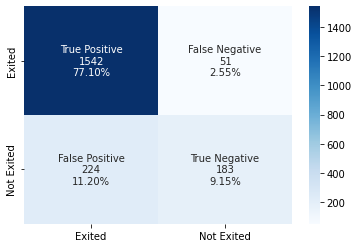

In [73]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cmr=confusion_matrix(y_test, y_predr)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Exited','Not Exited']
make_confusion_matrix(cmr, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [74]:
#Accuracy as per the classification report 
from sklearn import metrics
crr=metrics.classification_report(y_test,y_predr)
print(crr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



The predictions of the Exited improved. This model is using SMOT + hyperparameter tuning for : Number of layeers: are from 2- 10 , increment by 1 No. of neurons for input layer : 32 to 256, increase by 32 no of units for hidden layers: 32 to 256 bold text learning rate choices bold text bold text bold text.

THe prediction of exited has improved from 75% in base line to 78%. And the Recall of the exited also has increased from 43 to 48%.  Overall accuracy is still at 85% but the F1 score is sliglt improved. 

# **Model: SMOTE only

In [75]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [76]:
model1s = Sequential()
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1s.add(Dense(activation = 'relu', input_dim = 10, units=96))
model1s.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model1s.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model1s.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1s.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1s.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1s.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1s.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))


model1s.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.0001)
model1s.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [77]:
model1s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1056      
                                                                 
 dense_1 (Dense)             (None, 160)               15520     
                                                                 
 dense_2 (Dense)             (None, 96)                15456     
                                                                 
 dense_3 (Dense)             (None, 128)               12416     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 160)               20640     
                                                                 
 dense_6 (Dense)             (None, 64)                1

In [78]:
history1s = model1s.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 4s 7ms/step - loss: 0.6094 - accuracy: 0.6680 - val_loss: 0.6309 - val_accuracy: 0.6570
Epoch 2/50
160/160 [==============================] - 1s 6ms/step - loss: 0.5563 - accuracy: 0.7123 - val_loss: 1.0921 - val_accuracy: 0.2441
Epoch 3/50
160/160 [==============================] - 1s 8ms/step - loss: 0.5374 - accuracy: 0.7290 - val_loss: 0.4746 - val_accuracy: 0.7967
Epoch 4/50
160/160 [==============================] - 1s 9ms/step - loss: 0.5211 - accuracy: 0.7382 - val_loss: 0.7854 - val_accuracy: 0.5416
Epoch 5/50
160/160 [==============================] - 2s 10ms/step - loss: 0.5267 - accuracy: 0.7370 - val_loss: 0.4557 - val_accuracy: 0.7991
Epoch 6/50
160/160 [==============================] - 2s 10ms/step - loss: 0.5215 - accuracy: 0.7395 - val_loss: 0.6865 - val_accuracy: 0.6236
Epoch 7/50
160/160 [==============================] - 1s 9ms/step - loss: 0.5203 - accuracy: 0.7405 - val_loss: 0.6717 - val_accuracy: 0.6287
Epoc

In [79]:
y_pred1s=model1s.predict(X_test)
y_pred1s = (y_pred1s > 0.5)
y_pred1s

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

399/399 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7916


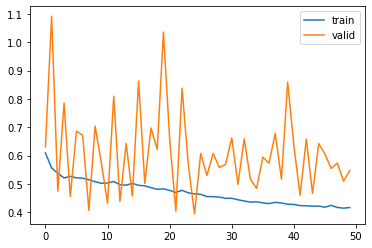

In [80]:
# Capturing learning history per epoch
hist1s  = pd.DataFrame(history1s.history)
hist['epoch'] = history1s.epoch
# Plotting accuracy at different epochs
plt.plot(history1s.history['loss'])
plt.plot(history1s.history['val_loss'])
plt.legend(("train" , "valid") , loc =0)
#Printing results
results1s = model1s.evaluate(X_sm,y_sm)

From the above plot, we observe that there is a lot of noise in the model.

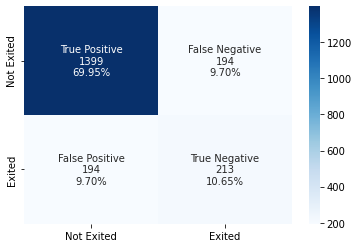

In [81]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1s=confusion_matrix(y_test, y_pred1s)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm1s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Not the best one

In [82]:
#Accuracy as per the classification report 
from sklearn import metrics
cr1s=metrics.classification_report(y_test,y_pred1s)
print(cr1s)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1593
           1       0.52      0.52      0.52       407

    accuracy                           0.81      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81      0.81      0.81      2000



 So, applying SMOTE A random increase of layers DOES improve the prediction of the Exited, But not all scores are great. I will try to improve other models with 'Dropouts and Batch processing.

# **Early Stopping**

In [116]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [117]:
# Initializing the model
model_3 = Sequential()

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_3.add(Dense(activation = 'relu', input_dim = 10, units=96)) # 
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_3.add(Dense(1, activation='sigmoid'))

In [85]:
# Model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1056      
                                                                 
 dense_1 (Dense)             (None, 32)                3104      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [86]:
optimizer=Adam(learning_rate=0.001)

In [87]:
# Compile model
model_3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=EPOCHS, validation_split = 0.2, verbose=1)

In [88]:
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5)
# Fitting the model on train and validation with 50 epochs
history_3 = model_3.fit(X_train, y_train,  validation_split=0.2, epochs=50,callbacks=es_cb)

Epoch 1/50
200/200 [==============================] - 3s 6ms/step - loss: 0.5703 - accuracy: 0.7847 - val_loss: 0.4877 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4744 - accuracy: 0.7973 - val_loss: 0.4542 - val_accuracy: 0.8081
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4634 - accuracy: 0.7964 - val_loss: 0.4561 - val_accuracy: 0.8081
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4620 - accuracy: 0.8016 - val_loss: 0.4793 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.8028 - val_loss: 0.4512 - val_accuracy: 0.8175
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.8027 - val_loss: 0.4480 - val_accuracy: 0.8175
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.4496 - accuracy: 0.8041 - val_loss: 0.4479 - val_accuracy: 0.8131


In [89]:
y_pred_3=model_3.predict(X_test)
y_pred_3 = (y_pred_3 > 0.5)
y_pred_3

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

7 Epochs ! for early stopping


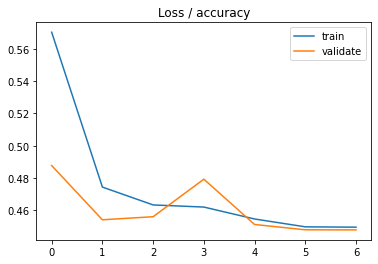

In [90]:
pyplot.title('Loss / accuracy')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

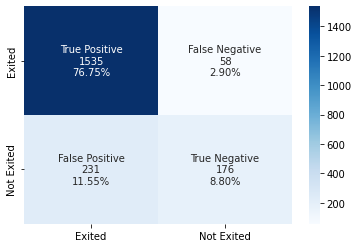

In [91]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm_3=confusion_matrix(y_test, y_pred_3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Exited','Not Exited']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here false Negatives have decreased. F1 score improved and Accuracy imporved.


In [92]:
#Accuracy as per the classification report 
from sklearn import metrics
cr_3=metrics.classification_report(y_test,y_pred_3)
print(cr_3)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.88      0.06      0.11       407

    accuracy                           0.81      2000
   macro avg       0.85      0.53      0.50      2000
weighted avg       0.82      0.81      0.73      2000



F1 score improved and Accuracy imporved. Recall increaaed
More importantly the exited (1) category improved from 88%. After Early stopping.

# **Batch Normalisation**

In [93]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [94]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(10,)))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
# Adding Batch Normalization
model_4.add(BatchNormalization())
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_4.add(Dense(1, activation='linear'))

In [95]:
# Model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                        

In [96]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'accuracy' as loss function and metrics
model_4.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_4 = model_4.fit(X_train, y_train,  validation_split=0.2, epochs=50,callbacks=es_cb)

Epoch 1/50
200/200 [==============================] - 6s 9ms/step - loss: 2.6473 - accuracy: 0.6941 - val_loss: 2.6122 - val_accuracy: 0.7075
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 2.0875 - accuracy: 0.7655 - val_loss: 1.8332 - val_accuracy: 0.7625
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 1.4636 - accuracy: 0.7650 - val_loss: 1.2793 - val_accuracy: 0.7331
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 2.3495 - accuracy: 0.6741 - val_loss: 2.8068 - val_accuracy: 0.7294
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 2.4132 - accuracy: 0.7570 - val_loss: 2.1234 - val_accuracy: 0.7700
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 1.8004 - accuracy: 0.7425 - val_loss: 1.3752 - val_accuracy: 0.7344
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 1.4349 - accuracy: 0.6861 - val_loss: 1.1914 - val_accuracy: 0.7244
Epoch 

In [97]:
y_pred_4=model_4.predict(X_test)
y_pred_4 = (y_pred_4 > 0.5)
y_pred_4

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

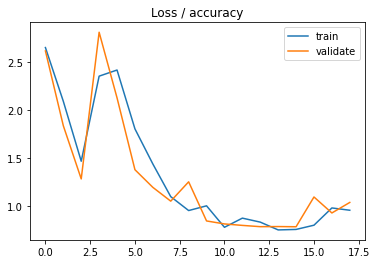

In [98]:
pyplot.title('Loss / accuracy')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Loss decreses on both the train and val and then increases. Not a good model

In [99]:
#Accuracy as per the classification report 
from sklearn import metrics
cr_4=metrics.classification_report(y_test,y_pred_4)
print(cr_4)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1593
           1       0.54      0.24      0.33       407

    accuracy                           0.80      2000
   macro avg       0.69      0.59      0.61      2000
weighted avg       0.77      0.80      0.77      2000



Loss decreses on both the train and val. Batch Normalisation is a not a good idea in this case.

# **Adding Dropout**

In [100]:
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint

In [101]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [102]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(10,)))
# Adding dropout with ratio of 0.2
model_5.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.1))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_5.add(Dense(1, activation='sigmoid'))

In [103]:
# Model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [104]:
# Initializing the Optimizer
optimizer = Adam(0.001)
# Compiling the model with 'accuracy' as loss function and metrics
model_5.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
# Fitting the model on train and validation with 50 epochs
history_5 = model_5.fit(X_train, y_train,  validation_split=0.2, epochs=50,callbacks=es_cb)

Epoch 1/50
200/200 [==============================] - 3s 5ms/step - loss: 1.0248 - accuracy: 0.6853 - val_loss: 0.5906 - val_accuracy: 0.7825
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.6086 - accuracy: 0.7730 - val_loss: 0.5459 - val_accuracy: 0.8000
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5521 - accuracy: 0.7919 - val_loss: 0.5250 - val_accuracy: 0.8000
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5380 - accuracy: 0.7937 - val_loss: 0.5169 - val_accuracy: 0.8000
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5236 - accuracy: 0.7948 - val_loss: 0.5007 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5151 - accuracy: 0.7953 - val_loss: 0.4917 - val_accuracy: 0.8000
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.7947 - val_loss: 0.4894 - val_accuracy: 0.8000
Epoch 

37 epochs

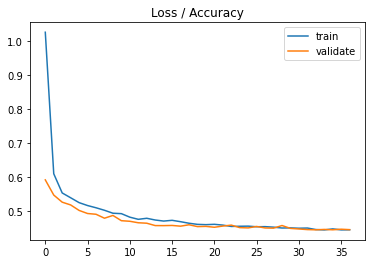

In [105]:
pyplot.title('Loss / Accuracy')
pyplot.plot(history_5.history['loss'], label='train')
pyplot.plot(history_5.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

Good Fit. 

In [106]:
y_pred_5=model_5.predict(X_test)
y_pred_5 = (y_pred_5 > 0.5)
y_pred_5

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

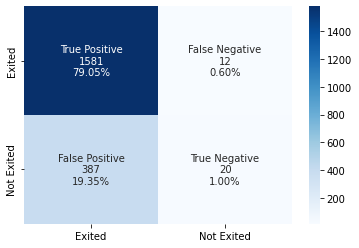

In [107]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm_5=confusion_matrix(y_test, y_pred_5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Exited','Not Exited']
make_confusion_matrix(cm_5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [108]:
#Accuracy as per the classification report 
from sklearn import metrics
cr_5=metrics.classification_report(y_test,y_pred_5)
print(cr_5)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1593
           1       0.62      0.05      0.09       407

    accuracy                           0.80      2000
   macro avg       0.71      0.52      0.49      2000
weighted avg       0.77      0.80      0.73      2000



Again not a great recall for predicting exits. 

# END OF MODEL **BUILDING**

In [109]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(10,)))
# Adding dropout with ratio of 0.2
model_5.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding dropout with ratio of 0.1
model_5.add(Dropout(0.1))
# Adding the second hidden layer with 16 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(16, activation='relu',kernel_initializer='he_uniform'))
# Adding the third hidden layer with 8 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(8, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer with one neuron and linear as activation
model_5.add(Dense(1, activation='sigmoid'))

In [110]:
input_dim= input_shape=10

In [111]:
modelfe = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu', input_shape=(input_dim,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [112]:
tf.TensorShape

tensorflow.python.framework.tensor_shape.TensorShape

In [113]:
tf.dtypes

<module 'tensorflow._api.v2.dtypes' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/dtypes/__init__.py'>

In [114]:
import tensorflow as tf

# Define a Keras layer
layer = tf.keras.layers.Dense(units=64)

# Get the output of the layer
x = layer(tf.zeros(shape=(1, 32)))

# Access the shape and data type of the output tensor
print(tf.TensorShape(x.shape))
print(tf.dtypes.as_dtype(x.dtype))

(1, 64)
<dtype: 'float32'>


In [118]:
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 33.2 MB/s eta 0:00:00


InvalidModelError: ignored

In [119]:
#Train a surrogate model (e.g., a decision tree)
from sklearn.tree import DecisionTreeClassifier
surrogate_model = DecisionTreeClassifier()
surrogate_model.fit(X_train, y_train)#

DecisionTreeClassifier()

In [120]:
#Compute SHAP values for the surrogate model
explainer = shap.KernelExplainer(surrogate_model.predict_proba, X_train[:100])
shap_values = explainer.shap_values(X_test[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

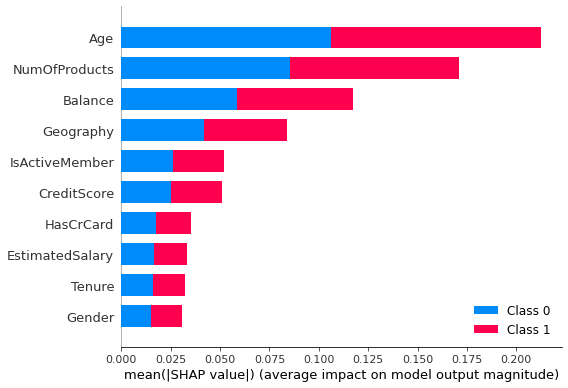

In [121]:
# Visualize SHAP values
shap.summary_plot(shap_values, X_test[:10])

We did SHAP using decision tree as the surrogate model. While this is NOT an ideal AL/ML result. it shows us a basic result that the top five features which the bank needs to look into are:

Age: As we can see from the EDA, the age group starts from sliglyt below 20 to upto 90 plus years. 
No. of products 
Balance:
Geography:
IS active Member:
Credit score:


Business Recommendations:

Age: As we can see from the EDA, the age group starts from sliglyt below 20 to upto 90 plus years. When we look at the Age Vs. Exited plot we notice that The Median age of people who exited the bank is higher Appr. 46 yers. The people who stay in the bank younger. Even the lower bounds of both the box plots (I.e with removed outliers) show that the exited people start at a slightly higher age. 
No. of products : The distribution cure with respect to No. Of products is different from the exited and non-exited. For Exited category max amount of people (1400) have 1 product, 
While the no. of products for non-exited are 2. 
Also, in the exited category people have different target products, 2=less than 400 people, 3= about 200 people, and 4=sliglty below 50 people. Perhaps having more number of products is necessrily not a great thing for the bank. It is a good idea to focus on one or two products (preferably 2 ).
Balance: Interestingly, a consider number of people (3000 approx) have 0 balance among non-exited group. That means these customers are not using any service but are just sleeping customers-giving the impression that they are customers. The company will not profit form these customers. The company should ALSO gear strategies to engage these customers to use the services.
Otherwise the balance distribution between exited and non-exited customers is similar.
Geography: Interestingly, As French people are double than spaniards and germans  their exits vs. non -exits follow the same patten for Non-exited group.
Among exited Many Germans are exiting. So the bank/company need to think how to attract/retain Germans.  
IS active Member: More number of people in not exited category are active members (4000 plus) vs. 700ish for exited members. 
Credit score: More no. People who have not exited have 800 plus credit score (app. 23-ish) vs. people who have 800 credit core who exited (about 70ish). 
So the bank should have some products offering to the people about 800 to retain them. 
Other wise the median credit score is almost same though exited have slightly above score. 

IN summary the bank should target customers of higher age bracket, with one or two products, and encourage the customers to have a bank balance. Somehow, target Germans more, have people with higher credit score and encourage the customers to be active.  

IN terms of the Best Models:
Model1. Basic Model: 
 precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.43      0.55       407

    accuracy                       0.86      2000
   macro avg         0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

—————
Model2. Optimised, AUC Threshold = of 0.78 

            precision    recall  f1-score   support

           0       0.92      0.75      0.83      1593
           1       0.43      0.74      0.55       407

    accuracy                      0.75      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82     0.75      0.77      2000

——
Model3. SMOTE + Hypertuning

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                      0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85    0.86      0.85      2000
____


Model4: SMOTE only

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1593
           1       0.52      0.52       0.52       407

    accuracy                      0.81      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.81    0.81      0.81      2000

—————————

Model5 :Early Stopping:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.88      0.06      0.11       407

    accuracy                           0.81      2000
   macro avg       0.85      0.53      0.50      2000
weighted avg       0.82      0.81      0.73      2000
—————

Model6 :Batch Normalisation

        precision    recall  f1-score   support

           0       0.83      0.95      0.89      1593
           1       0.54      0.24      0.33       407

    accuracy                     0.80      2000
   macro avg       0.69      0.59      0.61      2000
weighted avg       0.77    0.80      0.77      2000
_______

Model7: Adding Dropouts

        precision    recall  f1-score   support

           0       0.80      0.99      0.89      1593
           1       0.62      0.05      0.09       407

    accuracy                    0.80      2000
   macro avg       0.71     0.52      0.49      2000
weighted avg       0.77   0.80      0.73      2000



We buit seven models starting with a basic model, Model2. Optimised, AUC Threshold = of 0.78 , Model3. SMOTE + Hypertuning, Model4: SMOTE only, Model5 :Early Stopping, Model6 :Batch Normalisation, Model7: Adding Dropouts. 

We found the model with SMOTE and Hypertuning gave the best predicitons by far.

The precision for predicting exited is about 78% and non-exits is 87% with the reacll of 45% and 97% respectively. THe F1 score are 57% for exited. So the model is able to predict 57% corectly the exits, whiel it predits 92% the chances that the customer stays. THe overall accuracy is about 86%. 